In [1]:
import pandas as pd
import numpy as np
import gutenbergpy.textget
import re
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize, sent_tokenize
from plotnine import *

In [2]:
book_authors = {
    'Charles Dickens': [46, 98, 1400, 730, 766, 1023, 786, 580, 883],
    'Herman Melville': [2701, 11231, 15859, 21816, 34970, 10712, 12384, 4045, 8118, 2694, 13720, 53861],
    'Jane Austen': [1342, 158, 161, 105, 121, 141, 946]
}

In [3]:
book_contents = {}
for book_id in [book_id for id_list in book_authors.values() for book_id in id_list]:
    # Load in the book
    raw_book = gutenbergpy.textget.get_text_by_id(book_id)
    clean_book = gutenbergpy.textget.strip_headers(raw_book)
    # Convert to string
    book = clean_book.decode('UTF-8')
    # Remove first characters of the book (remove chapter headings, etc)
    #book = book[10000:]
    book_contents[book_id] = book


In [4]:
books_wtoks = {}
books_stoks = {}
for book_id, book in book_contents.items():
    books_wtoks[book_id] = word_tokenize(book)
    books_stoks[book_id] = sent_tokenize(book)

In [5]:
book_stats = {}
for book_id in book_contents.keys():
    book_stats[book_id] = {}
    book_stok = books_stoks[book_id]
    book_wtok = books_wtoks[book_id]
    (book_stats[book_id])['sent_chars'] = [len(sent) for sent in book_stok]
    (book_stats[book_id])['sent_words'] = [len(word_tokenize(sent)) for sent in book_stok]
    (book_stats[book_id])['word_chars'] = [len(word) for word in book_wtok]

In [10]:
# Convert to data frames
stat_dfs = {}
stat_names = book_stats[list(book_stats.keys())[0]]
for stat_name in stat_names:
    stat_data = {book_id:book_stat[stat_name] for book_id, book_stat in book_stats.items()}
    stat_data_df = pd.DataFrame.from_dict({k: pd.Series(v) for k, v in stat_data.items()}, orient='columns')
    stat_data_df_long = pd.melt(stat_data_df).dropna(how='any')
    stat_data_df_long.columns = ['book_id', stat_name]
    book_authors_df = pd.melt(pd.DataFrame.from_dict({k:pd.Series(v) for k, v in book_authors.items()}))
    book_authors_df.columns = ['author_name', 'book_id']
    stat_df_final = stat_data_df_long.merge(book_authors_df, on='book_id', how='left')
    stat_df_final = stat_df_final.sort_values('')
    stat_dfs = stat_df_list[]

In [74]:
# Plot the distributions by book
word_chars = {book_id:book_stat['word_chars'] for book_id, book_stat in book_stats.items()}

3.8702941176470587


In [104]:
book_authors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   author_name  36 non-null     object 
 1   book_id      28 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


In [120]:
book_authors_df = pd.melt(pd.DataFrame.from_dict({k:pd.Series(v) for k, v in book_authors.items()}))
book_authors_df.columns = ['author_name', 'book_id']
df = word_chars_df_long.copy()
df.columns = ['book_id', 'word_len']
df['book_id'] = df['book_id'].astype(np.float64)
print(book_authors_df.head(10))
print(df.head(10))
df.merge(book_authors_df, on='book_id', how='left')

       author_name  book_id
0  Charles Dickens     46.0
1  Charles Dickens     98.0
2  Charles Dickens   1400.0
3  Charles Dickens    730.0
4  Charles Dickens    766.0
5  Charles Dickens   1023.0
6  Charles Dickens    786.0
7  Charles Dickens    580.0
8  Charles Dickens    883.0
9  Charles Dickens      NaN
   book_id  word_len
0     46.0       1.0
1     46.0       9.0
2     46.0       5.0
3     46.0       2.0
4     46.0       5.0
5     46.0       5.0
6     46.0       1.0
7     46.0       5.0
8     46.0       5.0
9     46.0       2.0


,book_id,word_len,author_name
0,46.0,1.0,Charles Dickens
1,46.0,9.0,Charles Dickens
2,46.0,5.0,Charles Dickens
3,46.0,2.0,Charles Dickens
4,46.0,5.0,Charles Dickens
...,...,...,...
12421215,946.0,NaN,Jane Austen
12421216,946.0,NaN,Jane Austen
12421217,946.0,NaN,Jane Austen
12421218,946.0,NaN,Jane Austen


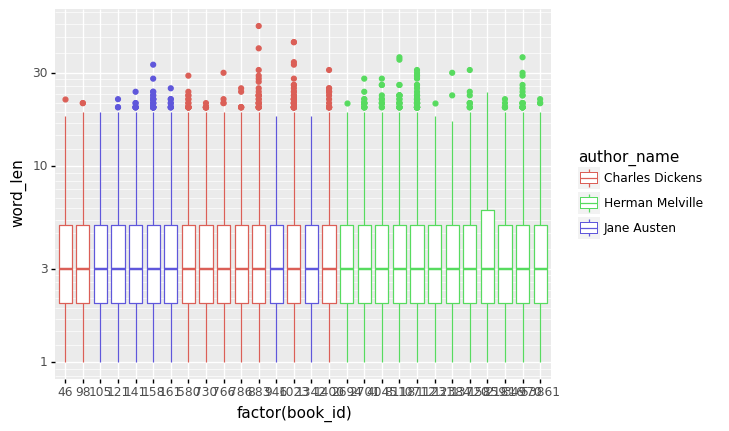

<ggplot: (124922622865)>

In [122]:
word_chars = {book_id:book_stat['word_chars'] for book_id, book_stat in book_stats.items()}
word_chars_df = pd.DataFrame.from_dict({k: pd.Series(v) for k, v in word_chars.items()}, orient='columns')
word_chars_df_long = pd.melt(word_chars_df).dropna(how='any')
word_chars_df_long.columns = ['book_id', 'word_len']
book_authors_df = pd.melt(pd.DataFrame.from_dict({k:pd.Series(v) for k, v in book_authors.items()}))
book_authors_df.columns = ['author_name', 'book_id']
graph_df = word_chars_df_long.merge(book_authors_df, on='book_id', how='left')

(
    ggplot(graph_df)
    + geom_boxplot(aes(x='factor(book_id)', y='word_len', color='author_name'))
    + scale_y_log10()
)


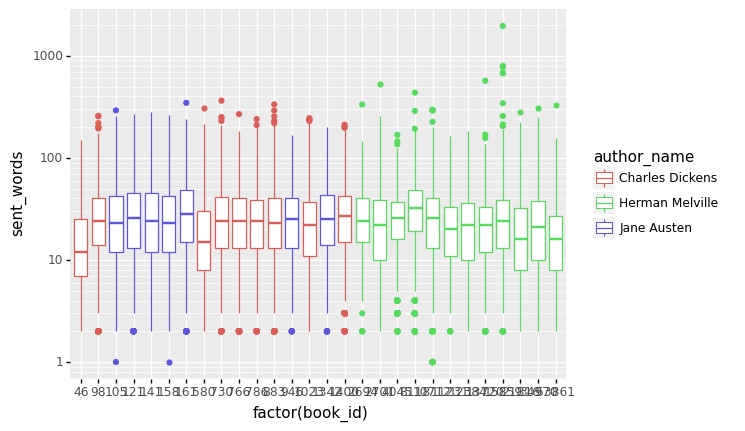

<ggplot: (124905093604)>

In [129]:
sent_words = {book_id:book_stat['sent_words'] for book_id, book_stat in
(
    ggplot(graph_df)
    + geom_boxplot(aes(x='factor(book_id)', y='sent_words', color='author_name'))
    + scale_y_log10()
)


In [90]:
pd.melt(df)

,variable,value
0,46,1.0
1,46,9.0
2,46,5.0
3,46,2.0
4,46,5.0
...,...,...
12421215,946,NaN
12421216,946,NaN
12421217,946,NaN
12421218,946,NaN


In [ ]:
sorted(grams)[0:10]

In [ ]:
list(grams)
new_grams = grams.copy()
gram_count = {}
for i in range(0, len(grams)-1):
    gram = new_grams.pop(0)
    if gram in new_grams:
        if gram not in gram_count:
            gram_count[gram] = 0
        gram_count[gram] += 1

In [ ]:
dict(sorted(gram_count.items(), key=lambda item: -item[1]))